## かめさん講座　機械学習入門
#### 27.階層クラスタリング

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# 擬似データ
x1 = np.array([1.2, 0.4, 1.6, 2.2, 4.1, 5.6, 6, 6.7, 7.3, 8, 8.6])
x2 = np.array([0.3, 1.7, 7, 1, 3.1, 4.1, 2.5, 7.7, 4.2, 3.3, 7.6])
# わかりやすいように各データに数字を振る
index = np.arange(len(x1))
X = np.array(list(zip(x1, x2)))

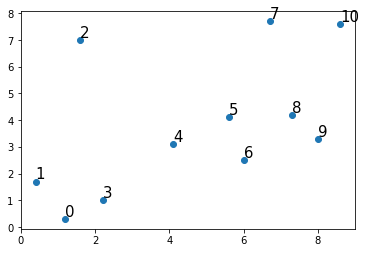

In [3]:
# 可視化
plt.plot(X[:, 0], X[:, 1], 'o')
for i in np.arange(len(x1)):
    plt.annotate(f'{i}', (x1[i], x2[i]+0.1), size=15)

In [4]:
Z = linkage(X, 'ward')
Z

array([[ 8.        ,  9.        ,  1.14017543,  2.        ],
       [ 0.        ,  3.        ,  1.22065556,  2.        ],
       [ 5.        ,  6.        ,  1.64924225,  2.        ],
       [ 7.        , 10.        ,  1.90262976,  2.        ],
       [ 1.        , 12.        ,  1.92959409,  3.        ],
       [ 4.        , 13.        ,  1.97652894,  3.        ],
       [11.        , 16.        ,  3.82848969,  5.        ],
       [ 2.        , 14.        ,  7.02614166,  3.        ],
       [17.        , 18.        ,  7.81052708,  8.        ],
       [15.        , 19.        , 12.84143979, 11.        ]])

In [5]:
Z[0]

array([8.        , 9.        , 1.14017543, 2.        ])

In [6]:
Z[16-len(X)]

array([ 4.        , 13.        ,  1.97652894,  3.        ])

In [7]:
Z[13-len(X)]

array([5.        , 6.        , 1.64924225, 2.        ])

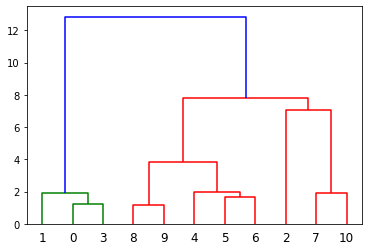

In [8]:
# dendrogramの描画

d  = dendrogram(Z)

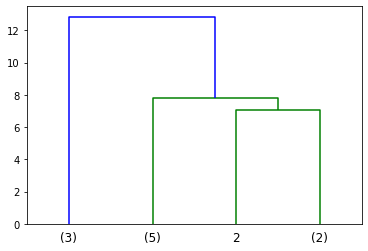

In [9]:
d = dendrogram(Z, truncate_mode='lastp', p=4)

In [10]:
# クラスタラベルの取得
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z ,t=4, criterion='maxclust')
clusters

array([1, 1, 4, 1, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

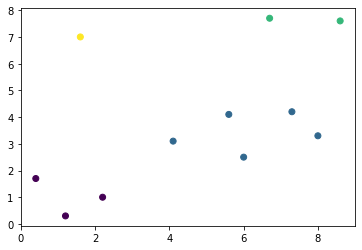

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)